In [154]:
import pandas as pd
import matplotlib.pyplot as plt

Wir lesen nun die Wahlerstatistiken aus Münster für die Landtagswahl 2022, Europawahlen 2019 und 2024 ein und vergleichen die Zahlen nach Kommunalbezirke

In [155]:
#Quellen https://wahlen.citeq.de/05515000/index.html

df=pd.read_csv("Dateien/Open-Data-05515000-Landtagswahl-Kommunalwahlbezirk.csv",sep=";", index_col='gebiet-name') #Landtagswahl 2022
df.rename(columns={'A':'Wahlberechtigte_Gesamt_LW22', 'B':'Waehler_LW22'},inplace=True)
df=df.loc[:,["Wahlberechtigte_Gesamt_LW22","Waehler_LW22"]]
print(df.head())
print("Anzahl Zeilen: ",df.shape[0])

             Wahlberechtigte_Gesamt_LW22  Waehler_LW22
gebiet-name                                           
1 Altstadt                          7471          5475
2 Schloss                           8078          5735
3 Kreuz                             8247          6328
4 Piusallee                         8202          5976
5 Uppenberg                         7653          4885
Anzahl Zeilen:  33


In [156]:
df1=pd.read_csv("Dateien/Open-Data-Europawahl105.csv",sep=";", index_col='gebiet-name') #Europawahl 2019
df1.rename(columns={'A':'Wahlberechtigte_Gesamt_EW19', 'B':'Waehler_EW19'},inplace=True)
df1=df1.loc[:,["Wahlberechtigte_Gesamt_EW19","Waehler_EW19"]]
print(df1.head())
print("Anzahl Zeilen: ",df1.shape[0])

             Wahlberechtigte_Gesamt_EW19  Waehler_EW19
gebiet-name                                           
1 Altstadt                          7599          6175
2 Schloss                           8566          6936
3 Kreuz                             7863          6596
4 Piusallee                         9138          7303
5 Uppenberg                         8621          6232
Anzahl Zeilen:  33


In [157]:
df2=pd.read_csv("Dateien/Open-Data-05515000-Europawahl-Kommunalwahlbezirk.csv",sep=";", index_col='gebiet-name') #Europawahl 2024
df2.rename(columns={'A':'Wahlberechtigte_Gesamt_EW24', 'B':'Waehler_EW24'},inplace=True)
df2=df2.loc[:,["Wahlberechtigte_Gesamt_EW24","Waehler_EW24"]]
print(df2.head())
print("Anzahl Zeilen: ",df2.shape[0])

             Wahlberechtigte_Gesamt_EW24  Waehler_EW24
gebiet-name                                           
1 Altstadt                          7449          6095
2 Schloss                           8128          6486
3 Kreuz                             8357          7066
4 Piusallee                         8289          6668
5 Uppenberg                         8001          5747
Anzahl Zeilen:  33


In [158]:
df.index==df1.index #Dataframes zusammenfügbar
df.index==df2.index #Dataframes zusammenfügbar

df_wahlen=pd.concat([df,df1,df2],axis=1)
df_wahlen.head()

,Wahlberechtigte_Gesamt_LW22,Waehler_LW22,Wahlberechtigte_Gesamt_EW19,Waehler_EW19,Wahlberechtigte_Gesamt_EW24,Waehler_EW24
gebiet-name,,,,,,
1 Altstadt,7471,5475,7599,6175,7449,6095
2 Schloss,8078,5735,8566,6936,8128,6486
3 Kreuz,8247,6328,7863,6596,8357,7066
4 Piusallee,8202,5976,9138,7303,8289,6668
5 Uppenberg,7653,4885,8621,6232,8001,5747


In [159]:
df_wahlen['Prozent_EW19']=(df_wahlen['Waehler_EW19']/df_wahlen['Wahlberechtigte_Gesamt_EW19'])*100
df_wahlen['Prozent_LW22']=(df_wahlen['Waehler_LW22']/df_wahlen['Wahlberechtigte_Gesamt_LW22'])*100
df_wahlen['Prozent_EW24']=(df_wahlen['Waehler_EW24']/df_wahlen['Wahlberechtigte_Gesamt_EW24'])*100
df_wahlen.head()

,Wahlberechtigte_Gesamt_LW22,Waehler_LW22,Wahlberechtigte_Gesamt_EW19,Waehler_EW19,Wahlberechtigte_Gesamt_EW24,Waehler_EW24,Prozent_EW19,Prozent_LW22,Prozent_EW24
gebiet-name,,,,,,,,,
1 Altstadt,7471,5475,7599,6175,7449,6095,81.260692,73.283362,81.823063
2 Schloss,8078,5735,8566,6936,8128,6486,80.971282,70.995296,79.798228
3 Kreuz,8247,6328,7863,6596,8357,7066,83.886557,76.730932,84.551873
4 Piusallee,8202,5976,9138,7303,8289,6668,79.919019,72.860278,80.443962
5 Uppenberg,7653,4885,8621,6232,8001,5747,72.288598,63.831177,71.828521


In [160]:
df_restricted=df_wahlen.loc[['14 Kinderhaus-West','15 Kinderhaus-Ost/Sprakel','16 Coerde','31 Gievenbeck-Süd','32 Gievenbeck-Nord','3 Kreuz'],['Prozent_EW19','Prozent_LW22','Prozent_EW24' ]]
df_restricted.sort_values(by='Prozent_EW19',ascending=False,inplace=True)
df_restricted

,Prozent_EW19,Prozent_LW22,Prozent_EW24
gebiet-name,,,
3 Kreuz,83.886557,76.730932,84.551873
31 Gievenbeck-Süd,74.755770,66.630077,74.694898
32 Gievenbeck-Nord,72.675968,65.511004,73.429880
15 Kinderhaus-Ost/Sprakel,68.681167,62.911753,69.189612
14 Kinderhaus-West,61.870737,55.629803,63.022830
16 Coerde,49.035770,43.206082,50.339170


In [161]:
df_test=df_restricted.transpose()
df_test

gebiet-name,3 Kreuz,31 Gievenbeck-Süd,32 Gievenbeck-Nord,15 Kinderhaus-Ost/Sprakel,14 Kinderhaus-West,16 Coerde
Prozent_EW19,83.886557,74.755770,72.675968,68.681167,61.870737,49.035770
Prozent_LW22,76.730932,66.630077,65.511004,62.911753,55.629803,43.206082
Prozent_EW24,84.551873,74.694898,73.429880,69.189612,63.022830,50.339170


Wir sehen dass die Wahlbeteiligung für die Landtagswahl 2022 prozentual etwas niedriger war als für die Europawahlen 2019 und 2024. Außerdem sehen wir für ausgewählte Stadtteile die Wahlbeteiligung der 3 Wahlen im Vergleich, prozentual absteigend sortiert. 
Wir schauen uns das Ganze auch nun mal graphisch an.

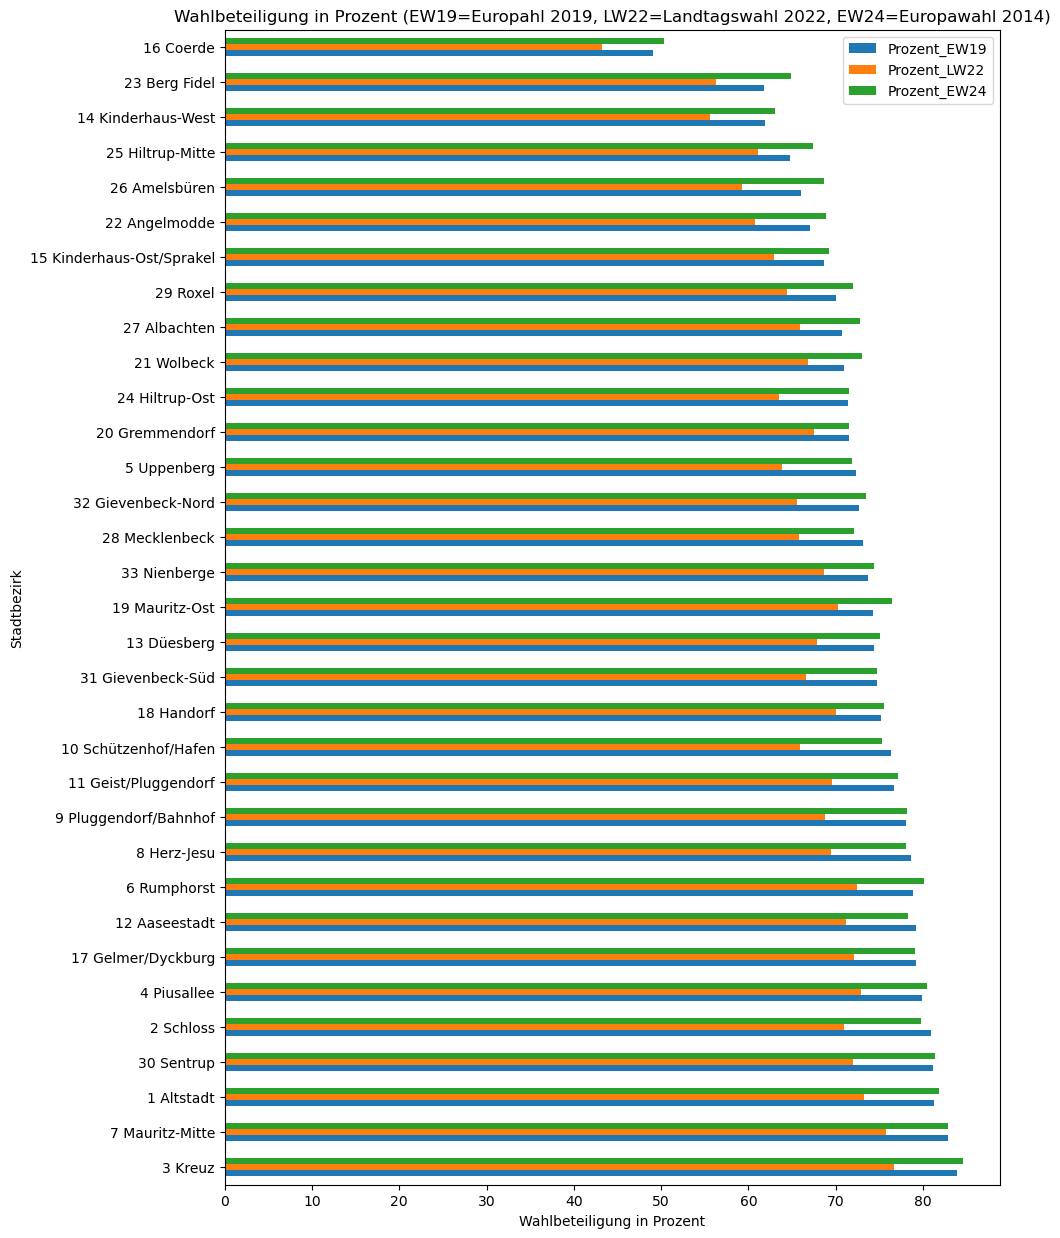

In [262]:
df_wahlen_res=df_wahlen.loc[:,['Prozent_EW19','Prozent_LW22','Prozent_EW24']]
df_wahlen_res.sort_values(by='Prozent_EW19',ascending=False,inplace=True)
df_wahlen_res.plot.barh(figsize=(10,15)).set(title='Wahlbeteiligung in Prozent (EW19=Europahl 2019, LW22=Landtagswahl 2022, EW24=Europawahl 2014)', xlabel='Wahlbeteiligung in Prozent', ylabel='Stadtbezirk')
plt.show()

Wahlergebnisse ausgewählter Stadtbezirke:


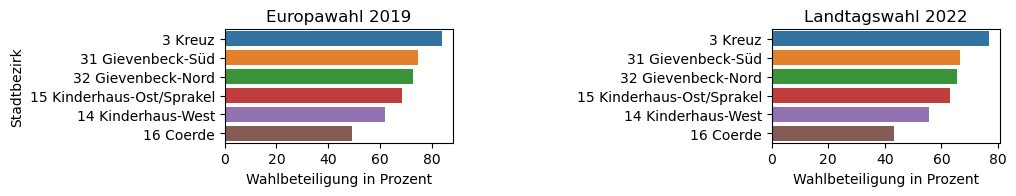

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Wahlergebnisse ausgewählter Stadtbezirke:")

plt.figure(figsize=(10,5))

plt.subplot(3,3,1)
sns.barplot(x=df_restricted['Prozent_EW19'] , y=df_restricted.index ).set(title='Europawahl 2019', xlabel='Wahlbeteiligung in Prozent',ylabel='Stadtbezirk')

plt.subplot(3,3,3)
sns.barplot(x=df_restricted['Prozent_LW22'] , y=df_restricted.index ).set(title='Landtagswahl 2022', xlabel='Wahlbeteiligung in Prozent', ylabel='')

plt.show()

Wir ordnen nun die oben untersuchten Gebiete Stadtbezirken zu, gemäß https://www.stadt-muenster.de/fileadmin/user_upload/stadt-muenster/61_stadtentwicklung/pdf/Erlaeuterungen_zum_Stassenverzeichnis.pdf 

In [222]:
#dictionary mit Einträgen mapping.items()
mapping= {'Hiltrup':['26 Amelsbüren','23 Berg Fidel','24 Hiltrup-Ost','25 Hiltrup-Mitte'], 
          'Nord':['16 Coerde', '14 Kinderhaus-West', '15 Kinderhaus-Ost/Sprakel'], 
          'Ost':['19 Mauritz-Ost','17 Gelmer/Dyckburg','18 Handorf'] , 
          'Suedost':['20 Gremmendorf','22 Angelmodde','21 Wolbeck'], 
          'West':['Gievenbeck-Süd','Gievenbeck-Nord','30 Sentrup','29 Roxel', '27 Albachten','28 Mecklenbeck','33 Nienberge'], 
          'Mitte': ['4 Piusallee','1 Altstadt','3 Kreuz','2 Schloss','10 Schützenhof/Hafen','9 Pluggendorf/Bahnhof','11 Geist/Pluggendorf','12 Aaseestadt','7 Mauritz-Mitte','13 Düesberg','8 Herz-Jesu','6 Rumphorst','5 Uppenberg'] }


tuples = [ (k, v) for k, values in mapping.items() for v in values ]
df_mapping= pd.DataFrame(tuples, columns=['Stadtgebiet','Stadtbezirk'])
df_mapping.head()


,Stadtgebiet,Stadtbezirk
0,Hiltrup,26 Amelsbüren
1,Hiltrup,23 Berg Fidel
2,Hiltrup,24 Hiltrup-Ost
3,Hiltrup,25 Hiltrup-Mitte
4,Nord,16 Coerde


In [221]:
filt=( (df_wahlen_res['Prozent_EW19']<70 )| (df_wahlen_res['Prozent_EW24']<70 )| (df_wahlen_res['Prozent_LW22']<65 )) #niedrige Wahlbeteiligung

low_percentage=[]
for col in df_wahlen_res[filt].index:
    low_percentage.append(col)
low_percentage


filt2=df_mapping['Stadtbezirk'].isin(low_percentage)
df_mapping[filt2]



,Stadtgebiet,Stadtbezirk
0,Hiltrup,26 Amelsbüren
1,Hiltrup,23 Berg Fidel
2,Hiltrup,24 Hiltrup-Ost
3,Hiltrup,25 Hiltrup-Mitte
4,Nord,16 Coerde
5,Nord,14 Kinderhaus-West
6,Nord,15 Kinderhaus-Ost/Sprakel
11,Suedost,22 Angelmodde
16,West,29 Roxel
32,Mitte,5 Uppenberg


Wir sehen dass die Wahlbeteiligung vor allem in den Stadtgebieten Hiltrup und Nord am niedrigsten ist. <br>

 <br>
 <br>

 <br>
Der Integrationsrat ist die demokratisch gewählte Politische Vertretung der in Münster lebenden Menschen mit Migrationsvorgeschichte. Die Wahl des Integrationsrates erfolgt an dem gleichen Tag wie die Kommunalwahl.
Er engagiert sich für die gleichberechtigte Teilhabe und Chancengleichheit der Menschen mit Migrationsvorgeschichte in allen Bereichen des politischen, gesellschaftlichen sowie kulturellen Lebens.

<br>

Webseite: https://www.integrationsrat-muenster.de/
<br>

<br>
Im Folgenden schauen wir uns die Integrationsratswahl an.


In [244]:
df3=pd.read_csv("Dateien/Open-Data-Integrationsratswahl-NRW176_Stimmbezirke.csv", sep=";",index_col='gebiet-name')
df3.rename(columns={'A':'Wahlberechtigte_Gesamt_IW20', 'B':'Waehler_IW20'},inplace=True)
df3=df3.loc[:,["Wahlberechtigte_Gesamt_IW20","Waehler_IW20"]]

#Wähleranzahlen zusammenfassen
df3.loc['Mitte']=df3.loc['Mitte 1']+df3.loc['Mitte 2']+df3.loc['Briefwahl Mitte 1']+df3.loc['Briefwahl Mitte 2']
df3.drop(index=['Mitte 1','Mitte 2'],inplace=True)
df3.loc['Nord','Waehler_IW20']=df3.loc['Nord','Waehler_IW20']+df3.loc['Briefwahl Nord','Waehler_IW20']
df3.loc['Ost','Waehler_IW20']=df3.loc['Ost','Waehler_IW20']+df3.loc['Briefwahl Ost','Waehler_IW20']
df3.loc['Südost','Waehler_IW20']=df3.loc['Südost','Waehler_IW20']+df3.loc['Briefwahl Südost','Waehler_IW20']
df3.loc['Hiltrup','Waehler_IW20']=df3.loc['Hiltrup','Waehler_IW20']+df3.loc['Briefwahl Hiltrup','Waehler_IW20']
df3.loc['West','Waehler_IW20']=df3.loc['West','Waehler_IW20']+df3.loc['Briefwahl West','Waehler_IW20']

filt=df3.index.str.contains('Briefwahl')
df3.loc[filt] 
df3=df3.drop(index=df3.loc[filt].index)

df3

,Wahlberechtigte_Gesamt_IW20,Waehler_IW20
gebiet-name,,
Nord,7960,1439
Ost,2755,586
Südost,4618,855
Hiltrup,6537,1060
West,10419,2131
Mitte,15879,3885


In [245]:
df3['Prozent_IW20']=(df3['Waehler_IW20']/df3['Wahlberechtigte_Gesamt_IW20'])*100
df3

,Wahlberechtigte_Gesamt_IW20,Waehler_IW20,Prozent_IW20
gebiet-name,,,
Nord,7960,1439,18.077889
Ost,2755,586,21.270417
Südost,4618,855,18.514508
Hiltrup,6537,1060,16.215389
West,10419,2131,20.453019
Mitte,15879,3885,24.466276


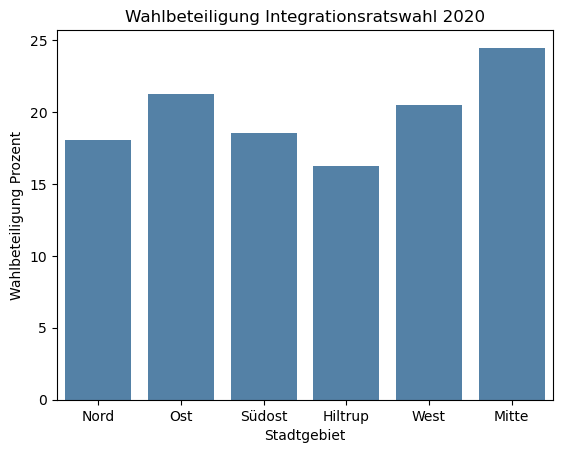

Auch für die Integrationsratswahl ist die Wahlbeteiligung in Münster Nord und Münster Hiltrup am niedrigsten. Nach 
   Stadtgebiet                Stadtbezirk
0      Hiltrup              26 Amelsbüren
1      Hiltrup              23 Berg Fidel
2      Hiltrup             24 Hiltrup-Ost
3      Hiltrup           25 Hiltrup-Mitte
4         Nord                  16 Coerde
5         Nord         14 Kinderhaus-West
6         Nord  15 Kinderhaus-Ost/Sprakel
11     Suedost              22 Angelmodde
16        West                   29 Roxel
32       Mitte                5 Uppenberg
deckt sich das mit der oben untersuchten Wahlbeteiligung der Europawahlen und der Landtagswahl, da es dort insbesondere in den Stadtbezirken Coerde und Berg Fidel niedrige Wahlbeteiligung gab.


In [267]:
sns.barplot(df3, x=df3.index, y="Prozent_IW20",color='steelblue').set(title = "Wahlbeteiligung Integrationsratswahl 2020",
                                                            xlabel = "Stadtgebiet",
                                                            ylabel = "Wahlbeteiligung Prozent")
plt.show()

a=df_mapping 
print("Auch für die Integrationsratswahl ist die Wahlbeteiligung in Münster Nord und Münster Hiltrup am niedrigsten. Nach unserem Mapping"
      , df_mapping[filt2], "deckt sich das mit der oben untersuchten Wahlbeteiligung der Europawahlen und der Landtagswahl, da es dort insbesondere in den Stadtbezirken Coerde und Berg Fidel niedrige Wahlbeteiligung gab.", sep="\n")
